In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner

In [2]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

print net_worths

[316.18428306022463, 128.4847139765763, 212.95377076201385, 217.96059712816052, 326.56693250553326, 314.0672608610164, 412.83425631014785, 159.09869458305818, 234.36051228130097, 142.1012008717193, 178.23164614375077, 259.43540492859483, 136.08924543132068, 142.98439510684403, 271.75164334973937, 270.00424941518054, 167.24337759331152, 300.0349466519055, 338.08951848957577, 96.75392597329417, 385.5629753784311, 320.4844739902693, 220.10056409375846, 140.25503627573087, 389.1123455094963, 220.96845179419734, 126.98012845155395, 157.51396036691344, 350.4872262016239, 287.91612500413447, 344.21586775541203, 368.29556369017877, 274.7300555052413, 378.84578142088196, 247.70089824206377, 256.83312700057957, 366.6772719000951, 260.8065975224045, 342.1862790220314, 291.4372247173825, 339.7693315999082, 140.9273656237994, 185.1870343522352, 200.22792608821422, 114.17956019265145, 173.10311583210583, 140.78722458080426, 221.1424445243783, 313.12236579136925, 189.73919689274533, 237.7316793878959

In [3]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

print net_worths_test


[[ 370.88459563]
 [ 405.98352578]
 [ 188.47791211]
 [ 173.10311583]
 [ 114.17956019]
 [ 291.43722472]
 [ 220.10056409]
 [ 276.85656224]
 [ 178.23164614]
 [ 316.18428306]]


/Users/yickminglee/.pyenv/versions/2.7.16/envs/minip/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Slope:  [[ 5.07793064]]
Intercept:  [ 25.21002155]


/Users/yickminglee/.pyenv/versions/2.7.16/envs/minip/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


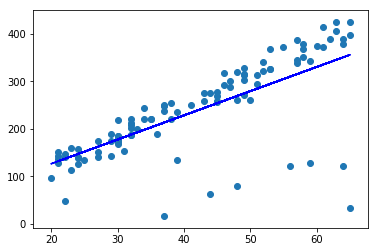

In [4]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
print 'Slope: ', reg.coef_
print 'Intercept: ', reg.intercept_

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


In [5]:
# Model Accuracy, how often is the classifier correct?
print 'Score (train): ', reg.score(ages_train, net_worths_train)
print 'Score (test): ', reg.score(ages_test, net_worths_test)


Score (train):  0.489872596175
Score (test):  0.878262470366


In [6]:
"""
    Clean away the 10% of points that have the largest
    residual errors (difference between the prediction
    and the actual net worth).

    Return a list of tuples named cleaned_data where 
    each tuple is of the form (age, net_worth, error).
"""

predictions = reg.predict(ages_train)
residuals = abs(predictions - net_worths_train)

cleaned_data = zip(ages_train, net_worths_train, residuals)
cleaned_data = sorted(cleaned_data, key=lambda x:x[2][0], reverse=True)
limit = int(len(net_worths_train)*0.1)

print len(cleaned_data)
print len(cleaned_data[limit:])
print cleaned_data[limit:]



90
81
[(array([63]), array([ 424.51073133]), array([ 79.39107925])), (array([61]), array([ 412.83425631]), array([ 77.87046551])), (array([53]), array([ 368.29556369]), array([ 73.95521804])), (array([57]), array([ 385.56297538]), array([ 70.91090716])), (array([65]), array([ 424.55804235]), array([ 69.28252898])), (array([55]), array([ 370.87480057]), array([ 66.37859364])), (array([58]), array([ 378.75051645]), array([ 59.02051758])), (array([46]), array([ 317.05788089]), array([ 58.26304975])), (array([49]), array([ 326.86999045]), array([ 52.84136738])), (array([52]), array([ 339.7693316]), array([ 50.5069166])), (array([48]), array([ 318.62560238]), array([ 49.67490995])), (array([62]), array([ 389.24094136]), array([ 49.19921993])), (array([58]), array([ 366.6772719]), array([ 46.94727303])), (array([34]), array([ 243.79287312]), array([ 45.93320969])), (array([60]), array([ 374.28347922]), array([ 44.39761907])), (array([65]), array([ 396.66651524]), array([ 41.39100187])), (arr

In [7]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

print cleaned_data


[(array([63]), array([ 424.51073133]), array([ 79.39107925])), (array([61]), array([ 412.83425631]), array([ 77.87046551])), (array([53]), array([ 368.29556369]), array([ 73.95521804])), (array([57]), array([ 385.56297538]), array([ 70.91090716])), (array([65]), array([ 424.55804235]), array([ 69.28252898])), (array([55]), array([ 370.87480057]), array([ 66.37859364])), (array([58]), array([ 378.75051645]), array([ 59.02051758])), (array([46]), array([ 317.05788089]), array([ 58.26304975])), (array([49]), array([ 326.86999045]), array([ 52.84136738])), (array([52]), array([ 339.7693316]), array([ 50.5069166])), (array([48]), array([ 318.62560238]), array([ 49.67490995])), (array([62]), array([ 389.24094136]), array([ 49.19921993])), (array([58]), array([ 366.6772719]), array([ 46.94727303])), (array([34]), array([ 243.79287312]), array([ 45.93320969])), (array([60]), array([ 374.28347922]), array([ 44.39761907])), (array([65]), array([ 396.66651524]), array([ 41.39100187])), (array([30

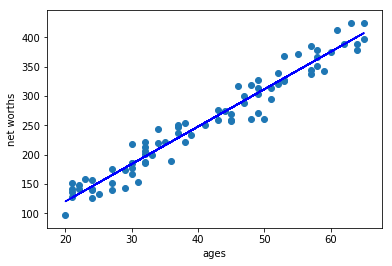

Slope:  [[ 6.36859481]]
Intercept:  [-6.91861069]
Score (train):  0.409325454478
Score (test):  0.983189455396


In [9]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

    print 'Slope: ', reg.coef_
    print 'Intercept: ', reg.intercept_
    # Model Accuracy, how often is the classifier correct?
    print 'Score (train): ', reg.score(ages_train, net_worths_train)
    print 'Score (test): ', reg.score(ages_test, net_worths_test)

else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

